In [12]:
import cv2
import  matplotlib.pyplot as plt
import numpy as np
import playsound
from ultralytics import YOLO
import pyaudio
import wave

In [2]:
net = cv2.dnn.readNet(r"C:\Users\pavani\OneDrive\Documents\yolov3.cfg",r"C:\Users\pavani\OneDrive\Documents\yolov3.weights")

In [4]:
classes =[]

In [2]:
with open(r"C:\Users\pavani\OneDrive\Documents\coco.names",'r') as f:
    classes = f.read().splitlines()

In [3]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [6]:
len(classes)

80

In [12]:
cap = cv2.VideoCapture(r"C:\Users\pavani\OneDrive\Pictures\video (1).mp4")
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(100, 3))

while True:
    _, img = cap.read()
    height, width, _ = img.shape

    blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0,0,0), swapRB=True, crop=False)
    net.setInput(blob)
    output_layers_names = net.getUnconnectedOutLayersNames()
    layerOutputs = net.forward(output_layers_names)
    
    boxes = []
    confidences = []
    class_ids = []
    
    for output in layerOutputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.2:
                center_x = int(detection[0]*width)
                center_y = int(detection[1]*height)
                w = int(detection[2]*width)
                h = int(detection[3]*height)

                x = int(center_x - w/2)
                y = int(center_y - h/2)

                boxes.append([x, y, w, h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.2, 0.4)

    if len(indexes)>0:
        for i in indexes.flatten():
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i],2))
            color = colors[i]
            cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
            cv2.putText(img, label + " " + confidence, (x, y+20), font, 2, (255,255,255), 2)

    cv2.imshow('Image', img)
    key = cv2.waitKey(1)
    if key==27:
        break

cap.release()
cv2.destroyAllWindows()

IndexError: index 100 is out of bounds for axis 0 with size 100

In [12]:
net1.setInputSize(320,320)
net1.setInputScale(1.0/127.5)
net1.setInputMean((127.5,127.5,127.5))
net1.setInputSwapRB(True)

< cv2.dnn.Model 0000022C4E901410>

In [11]:
net1 = cv2.dnn_DetectionModel(r"C:\Users\pavani\OneDrive\Documents\yolov3.cfg",r"C:\Users\pavani\OneDrive\Documents\yolov3.weights")

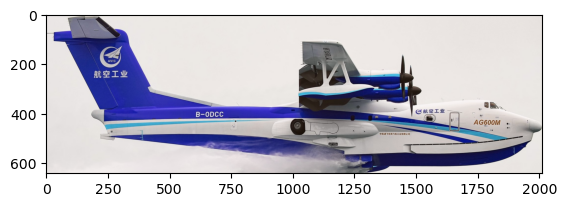

In [13]:
img = cv2.imread(r"C:\Users\pavani\OneDrive\Pictures\new\val\AG600\64dbfffa3f046e8521d80c24bf520884_0.jpg")
plt.imshow(img)

In [23]:
classIndex,confidence,bbox = net1.detect(img,confThreshold=0.4)

In [21]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for classInd,conf,boxes in zip(classIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classlabels[classInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

AttributeError: 'tuple' object has no attribute 'flatten'

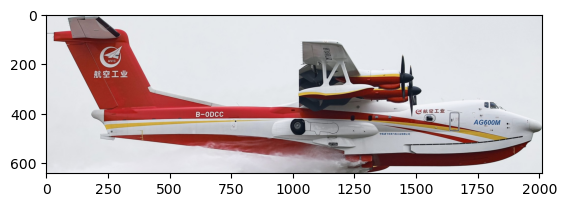

In [22]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [4]:
import winsound

In [18]:
import cv2
import numpy as np
from playsound import playsound
import winsound
# library for playing sound

# Load YOLOv8 model and classes
net = cv2.dnn.readNet(r"C:\Users\pavani\OneDrive\Documents\yolov3.cfg",r"C:\Users\pavani\OneDrive\Documents\yolov3.weights")

# Set up beep sound
  # replace with the path to your beep sound file

# Set up OpenCV window
win_name = "YOLO Object Detection"
cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)

# Load image or video file
#file_path = "input.mp4"  # replace with the path to your image or video file
cap = cv2.VideoCapture(0)

# Specify the object you want to detect and play beep sound for
object_to_detect = "cell phone"


while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Detect objects using YOLOv4
    blob = cv2.dnn.blobFromImage(frame, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    outputs = net.forward(net.getUnconnectedOutLayersNames())

    # Draw bounding boxes and play beep sound for the specified object
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                class_name = classes1[class_id]
                if class_name == object_to_detect:
                    center_x = int(detection[0] * frame.shape[1])
                    center_y = int(detection[1] * frame.shape[0])
                    width = int(detection[2] * frame.shape[1])
                    height = int(detection[3] * frame.shape[0])
                    left = int(center_x - width / 2)
                    top = int(center_y - height / 2)
                    cv2.rectangle(frame, (left, top), (left + width, top + height), (0, 255, 0), 2)
                    cv2.putText(frame, class_name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                    stream.write(wf.readframes(wf.getnframes()))

    # Show output frame
    cv2.imshow(win_name, frame)
    if cv2.waitKey(1) == ord('q'):
        break

# Clean up
cap.release()
cv2.destroyAllWindows()

In [5]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [6]:
with open(r"C:\Users\pavani\OneDrive\Documents\coco.names",'r') as f:
    classes1 = f.read().splitlines()

In [7]:
classes1

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [17]:
wf = wave.open(r"C:\Users\pavani\Downloads\beep-01a.wav", 'rb')
p = pyaudio.PyAudio()
stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                channels=wf.getnchannels(),
                rate=wf.getframerate(),
                output=True)

In [21]:
'watch' in classes

False

In [1]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from scratch
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

In [8]:
from roboflow import Roboflow
rf = Roboflow(api_key="an20C2KWMJf3eZ98w5U3")
project = rf.workspace("bhupendra-dewangan-rzuyx").project("clamping")
dataset = project.version(5).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.73, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to clamping-5 in yolov8:: 100%|██████████| 1976/1976 [00:05<00:00, 347.05it/s]


In [14]:
import cv2
import pandas as pd
import numpy as np
from ultralytics import YOLO


model=YOLO(r"C:\Users\pavani\Downloads\best (2).pt")


def RGB(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE :  
        colorsBGR = [x, y]
        print(colorsBGR)
        

cv2.namedWindow('RGB')
cv2.setMouseCallback('RGB', RGB)

cap=cv2.VideoCapture(r"C:\Users\pavani\Downloads\New_Angle_Video (2).mp4")


my_file = open("coco1.txt", "r")
data = my_file.read()
class_list = data.split("\n")
#print(class_list)
count=0
   

while True:    
    ret,frame = cap.read()   
    count += 1
    if count % 3 != 0:
        continue


    frame=cv2.resize(frame,(1020,500))

    results=model.predict(frame)
 #   print(results)
    a=results[0].boxes.boxes
    px=pd.DataFrame(a).astype("float")
#    print(px)
    for index,row in px.iterrows():
#        print(row)
 
        x1=int(row[0])
        y1=int(row[1])
        x2=int(row[2])
        y2=int(row[3])
        d=int(row[5])
        c=class_list[d]
        cv2.rectangle(frame,(x1,y1),(x2,y2),(0,255,0),2) 
        cv2.putText(frame,str(c),(x1,y1),cv2.FONT_HERSHEY_COMPLEX,0.5,(255,0,0),1)
    cv2.imshow("RGB", frame)
    if cv2.waitKey(1)&0xFF==27:
        break
cap.release()
cv2.destroyAllWindows()


0: 416x800 1 Clamp 2 close, 1 Clamp 2 open, 2 Clamp 3 opens, 2 Clamp 4 opens, 2 Clamp 5 opens, 2 Clamp 6 opens, 4 Clamp 7 opens, 419.2ms
Speed: 4.1ms preprocess, 419.2ms inference, 15.6ms postprocess per image at shape (1, 3, 800, 800)

0: 416x800 1 Clamp 2 close, 1 Clamp 2 open, 2 Clamp 3 opens, 2 Clamp 4 opens, 2 Clamp 5 opens, 2 Clamp 6 opens, 3 Clamp 7 opens, 281.9ms
Speed: 2.0ms preprocess, 281.9ms inference, 0.0ms postprocess per image at shape (1, 3, 800, 800)

0: 416x800 2 Clamp 2 closes, 1 Clamp 2 open, 2 Clamp 3 opens, 2 Clamp 4 opens, 2 Clamp 5 opens, 2 Clamp 6 opens, 2 Clamp 7 opens, 332.6ms
Speed: 0.0ms preprocess, 332.6ms inference, 0.0ms postprocess per image at shape (1, 3, 800, 800)

0: 416x800 1 Clamp 2 close, 1 Clamp 2 open, 2 Clamp 3 opens, 2 Clamp 4 opens, 2 Clamp 5 opens, 2 Clamp 6 opens, 3 Clamp 7 opens, 300.1ms
Speed: 10.1ms preprocess, 300.1ms inference, 0.0ms postprocess per image at shape (1, 3, 800, 800)

0: 416x800 1 Clamp 2 close, 1 Clamp 2 open, 2 Clamp 

KeyboardInterrupt: 